<a href="https://colab.research.google.com/github/ambreen1038/IMBD_Review_Analysis/blob/main/NLP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# ---------------------------                                                 
# NLP Assignment 2

# ---------------------------


# Name:    Ambreen Habib
# Reg# :    L1S22BSCS0263
# Section: G3


# ------------------------------------------

# Disaster Tweet Classification
# ------------------------------------------

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Load tweets Dataset
df = pd.read_csv("tweets.csv")
df = df[['keyword', 'location', 'text', 'target']]


# Fill missing keyword/location and combine
df['keyword'] = df['keyword'].fillna('')
df['location'] = df['location'].fillna('')

# Combine all into one feature for text processing
df['full_text'] = df['keyword'] + ' ' + df['location'] + ' ' + df['text']

#df = df.sample(n=600, random_state=42).reset_index(drop=True)
df['target'].value_counts()


,count
target,
0,9256
1,2114


In [13]:
# Preprocess the Combined Text
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['full_text'].apply(preprocess)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [14]:
# TF-IDF Vectorization

tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['target'].values



In [15]:
#  Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train[:150])
print(y_test[:150])



[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1]
[0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 0 0]


In [16]:
#  Train Logistic Regression Model

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')


### **Model Evaluation Metrics**

| Metric       | Score   |
|--------------|---------|
| **Accuracy** | `0.8289` |
| **Precision**| `0.5057` |
| **Recall**   | `0.7904` |
| **F1 Score** | `0.6167` |


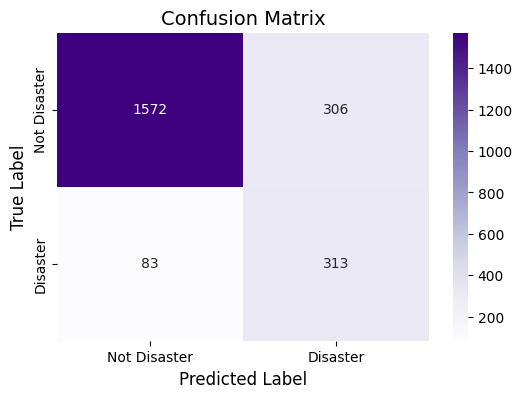

In [17]:
# Evaluate the Model
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

from IPython.display import display, Markdown

# Display results
def display_metrics(acc, prec, rec, f1):
    display(Markdown(f"""
### **Model Evaluation Metrics**

| Metric       | Score   |
|--------------|---------|
| **Accuracy** | `{acc:.4f}` |
| **Precision**| `{prec:.4f}` |
| **Recall**   | `{rec:.4f}` |
| **F1 Score** | `{f1:.4f}` |
"""))

display_metrics(acc, prec, rec, f1)

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Disaster', 'Disaster']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()


In [18]:
def predict_tweet(text, keyword='', location=''):
    combined = keyword + ' ' + location + ' ' + text
    cleaned = preprocess(combined)
    vector = tfidf.transform([cleaned]).toarray()
    prediction = model.predict(vector)[0]
    label = "Disaster" if prediction == 1 else " Not Disaster"

    display(Markdown(f"""
### **Tweet Prediction**
> `{text}`
> **Keyword**: `{keyword}`
> **Location**: `{location}`

**Prediction**: **{label}**
"""))


In [19]:
predict_tweet(
    "Wildfires spreading uncontrollably near the forest edge.",
    keyword="wildfire",
    location="California"
)

predict_tweet(
    "Watching a movie with my friends ",
    keyword="",
    location="home"
)



### **Tweet Prediction**
> `Wildfires spreading uncontrollably near the forest edge.`  
> **Keyword**: `wildfire`  
> **Location**: `California`  

**Prediction**: **Disaster**



### **Tweet Prediction**
> `Watching a movie with my friends `  
> **Keyword**: ``  
> **Location**: `home`  

**Prediction**: ** Not Disaster**


In [20]:
sample_tweets = [
    ("Bridge collapsed during earthquake", "earthquake", "Nepal"),
    ("Having lunch at the cafe", "", "New York"),
    ("Major flooding reported downtown", "flood", "Houston")
]

for text, kw, loc in sample_tweets:
    predict_tweet(text, kw, loc)



### **Tweet Prediction**
> `Bridge collapsed during earthquake`  
> **Keyword**: `earthquake`  
> **Location**: `Nepal`  

**Prediction**: **Disaster**



### **Tweet Prediction**
> `Having lunch at the cafe`  
> **Keyword**: ``  
> **Location**: `New York`  

**Prediction**: ** Not Disaster**



### **Tweet Prediction**
> `Major flooding reported downtown`  
> **Keyword**: `flood`  
> **Location**: `Houston`  

**Prediction**: **Disaster**
